In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

_grid = np.linspace(-20, 20, 500)

In [3]:
# reference: https://twiki.cern.ch/twiki/bin/view/LHCPhysics/LHCHXSWGHH
hh_xsec_NNLONNLL_201516 = 33.49 # FT NLO; infinite top mass NNLO
hh_xsec_NNLONNLL_2018 = 31.02 # FT NLO; FTApprox NNLO


# CASE1: kappa_lambda dependence NNLO+NNLL with infinite top mass

In [4]:
# YR4 Tab.63
# R = xsec(kl) / xsec(kl=1) at NNLO+NNLL with infinite top mass
# xsec = hh_xsec_NNLONNLL_201516 * R
R_NNLONNLL_xsec = np.array([3.85, 2.92, 2.13, 1.49, 0.466])
R_NNLONNLL_kl = np.array([-1, -0.5, 0, 0.5, 2])

R_NNLONNLL_func = np.poly1d( np.polyfit(R_NNLONNLL_kl, R_NNLONNLL_xsec, 2) )
print(R_NNLONNLL_func)

        2
0.2965 x - 1.425 x + 2.13


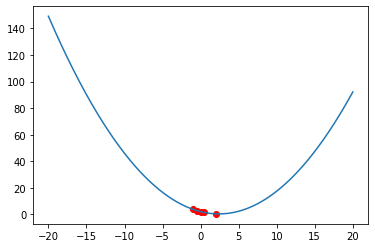

In [5]:
plt.plot(R_NNLONNLL_kl, R_NNLONNLL_xsec, 'ro')
plt.plot(_grid, R_NNLONNLL_func(_grid) )
#plt.ylim(0,50)

33.49
       2
9.929 x - 47.73 x + 71.34


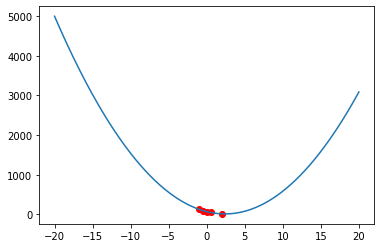

In [6]:
# scale with xs at kappa_lambda=1
_sf = hh_xsec_NNLONNLL_201516
print(_sf)

# output: function
hh_xsec_CASE1 = R_NNLONNLL_func*_sf

# plot
plt.plot(R_NNLONNLL_kl, R_NNLONNLL_xsec*_sf, 'ro')
plt.plot(_grid, hh_xsec_CASE1(_grid) )

print(hh_xsec_CASE1)

33.521069999999995


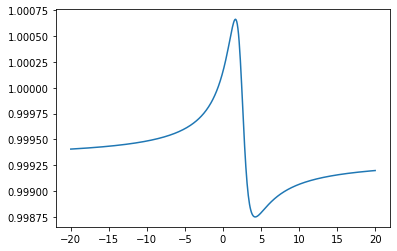

In [7]:
# cross check
# from bbtautau in the last round
# 33.41 -> 33.49 taken into account
# Minimizer is Linear
# Chi2                      =  1.94943e-08
# NDf                       =            3
# p0                        =    0.0713265   +/-   4.36236e-05
# p1                        =   -0.0477408   +/-   4.84943e-05
# p2                        =   0.00993537   +/-   3.51815e-05


xsec_frombbtt = np.poly1d([0.00993537,-0.0477408,0.0713265])*1000
print(xsec_frombbtt(1))

_cmp = hh_xsec_CASE1(_grid)/xsec_frombbtt(_grid)

plt.plot(_grid, _cmp )
#plt.plot(_grid, xsec_frombbtt(_grid))
#plt.plot(_grid, hh_xsec_CASE1(_grid))

# conclusion: agreement with bbtautau provided xsec <~1.25 per mille, consider as numeric

In [8]:
# TEST kappa_lambda parameterisation used in likelihood construction
xsec_kl00 = hh_xsec_CASE1(0)
xsec_kl01 = hh_xsec_CASE1(1)
xsec_kl20 = hh_xsec_CASE1(20)

def xsec_kl_param( kl, kt, A, B, C, scheme='0,1,20' ):
  res = 0

  A_coef = 0
  B_coef = 0
  C_coef = 0
  if scheme == '0,1,2':
    A_coef = kt*kt - 3*kt*kl/2. + kl*kl/2.
    B_coef = 2*kt*kl - kl*kl
    C_coef = -kt*kl/2. + kl*kl/2.
  if scheme == '0,1,20':
    A_coef = kt*kt - 399*kt*kl/380. + kl*kl/20.
    B_coef = 20*kt*kl/19. - kl*kl/19.
    C_coef = -kt*kl/380. + kl*kl/380.
  else:
    print('{0} is NOT FOUND'.format(scheme))
    sys.exit(1)

  res = kt*kt*( A_coef*A + B_coef*B + C_coef*C )
  return res

xsec_kl_param_0120 = np.array( [ xsec_kl_param(ikl, 1, xsec_kl00, xsec_kl01, xsec_kl20) for ikl in _grid ] )

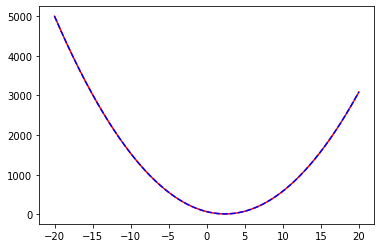

In [9]:
plt.plot(_grid, xsec_kl_param_0120, 'r')
plt.plot(_grid, hh_xsec_CASE1(_grid), 'b--' )

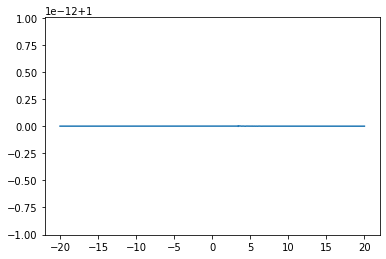

In [10]:
plt.plot(_grid, xsec_kl_param_0120/hh_xsec_CASE1(_grid))

# CASE2: kappa_lambda dependence NLO with FT


In [11]:
# https://arxiv.org/pdf/1903.08137.pdf
#input_NLO_xsec = np.array([116.71, 62.51, 27.84, 12.42, 11.65, 16.28, 81.74])
#input_NLO_kl = np.array([-1, 0, 1, 2, 2.4, 3, 5])

# update from Arnaud pinging theorists for adding more points in the scan (2019-08-22)
# scale uncertainties for new points
# -5:         524.65 fb   (+18.0%) (-14.7%)
# -10:      1468.13 fb  (+18.4%) (-14.9%)
# +10:      582.26 fb   (+19.5%) (-15.4%)
# PDF uncertainty is 3% uniformly
input_NLO_xsec = np.array([1468.13, 524.65, 116.71, 62.51, 27.84, 12.42, 11.65, 16.28, 81.74, 582.26])
input_NLO_kl = np.array([-10, -5, -1, 0, 1, 2, 2.4, 3, 5, 10])

input_NLO_xsec_func = np.poly1d( np.polyfit(input_NLO_kl, input_NLO_xsec, 2) )
print(input_NLO_xsec_func)


       2
9.626 x - 44.3 x + 62.55


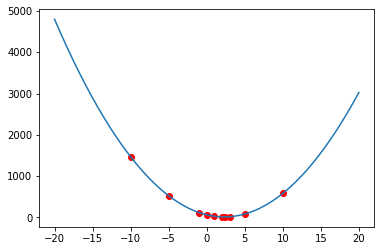

In [12]:
plt.plot(input_NLO_kl, input_NLO_xsec, 'ro')
plt.plot(_grid, input_NLO_xsec_func(_grid) )
#plt.ylim(10,20)

1.2009581589916165
       2
11.56 x - 53.2 x + 75.13


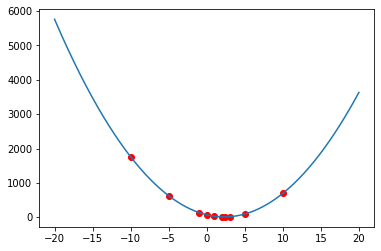

In [13]:
# scale with xs at kappa_lambda=1
_sf = hh_xsec_NNLONNLL_201516/input_NLO_xsec_func(1)
print(_sf)

# output: function
hh_xsec_CASE2 = input_NLO_xsec_func*_sf
print(hh_xsec_CASE2)

# plot
plt.plot(input_NLO_kl, input_NLO_xsec*_sf, 'ro')
plt.plot(_grid, hh_xsec_CASE2(_grid) )

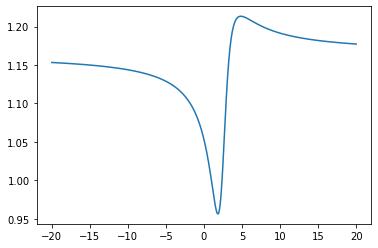

In [14]:
cmp = hh_xsec_CASE2(_grid)/hh_xsec_CASE1(_grid)

plt.plot(_grid, cmp )

       2
9.626 x - 44.3 x + 62.55
           3         2
0.0001257 x + 9.626 x - 44.31 x + 62.56
           4             3         2
2.452e-05 x + 0.0001272 x + 9.624 x - 44.31 x + 62.58
            5             4            3         2
-3.058e-05 x + 2.808e-05 x + 0.003768 x + 9.623 x - 44.36 x + 62.62


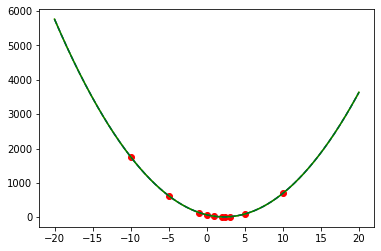

In [26]:
# test with higher orders
input_NLO_xsec_func_p3 = np.poly1d( np.polyfit(input_NLO_kl, input_NLO_xsec, 3) )
input_NLO_xsec_func_p4 = np.poly1d( np.polyfit(input_NLO_kl, input_NLO_xsec, 4) )
input_NLO_xsec_func_p5 = np.poly1d( np.polyfit(input_NLO_kl, input_NLO_xsec, 5) )

_sf = hh_xsec_NNLONNLL_201516/input_NLO_xsec_func_p3(1)
hh_xsec_CASE2_p3 = input_NLO_xsec_func_p3*_sf
_sf = hh_xsec_NNLONNLL_201516/input_NLO_xsec_func_p4(1)
hh_xsec_CASE2_p4 = input_NLO_xsec_func_p4*_sf
_sf = hh_xsec_NNLONNLL_201516/input_NLO_xsec_func_p5(1)
hh_xsec_CASE2_p5 = input_NLO_xsec_func_p5*_sf

print(input_NLO_xsec_func)
print(input_NLO_xsec_func_p3)
print(input_NLO_xsec_func_p4)
print(input_NLO_xsec_func_p5)

plt.plot(input_NLO_kl, input_NLO_xsec*_sf, 'ro')
plt.plot(_grid, hh_xsec_CASE2(_grid), 'y' )
plt.plot(_grid, hh_xsec_CASE2_p3(_grid), 'b--' )
plt.plot(_grid, hh_xsec_CASE2_p4(_grid), 'g-' )
#plt.ylim(10,100)

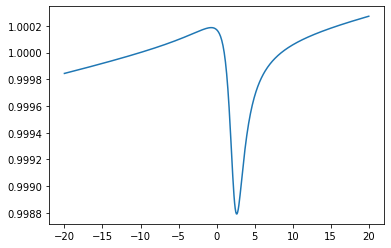

In [16]:
_cmp = hh_xsec_CASE2_p3(_grid)/hh_xsec_CASE2(_grid)
plt.plot(_grid, _cmp)

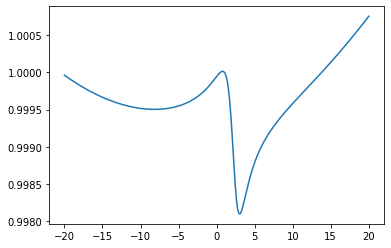

In [17]:
_cmp = hh_xsec_CASE2_p4(_grid)/hh_xsec_CASE2(_grid)
plt.plot(_grid, _cmp)

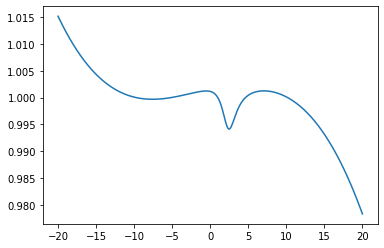

In [18]:
_cmp = hh_xsec_CASE2_p5(_grid)/hh_xsec_CASE2(_grid)
plt.plot(_grid, _cmp)

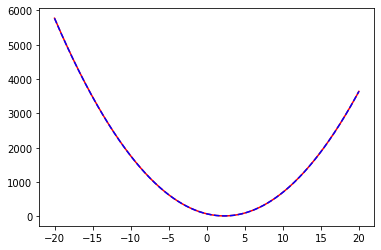

In [19]:
# TEST with kappa_lambda parameterisation

xsec_kl00 = hh_xsec_CASE2_p4(0)
xsec_kl01 = hh_xsec_CASE2_p4(1)
xsec_kl20 = hh_xsec_CASE2_p4(20)

xsec_kl_param_0120 = np.array( [ xsec_kl_param(ikl, 1, xsec_kl00, xsec_kl01, xsec_kl20) for ikl in _grid ] )
plt.plot(_grid, xsec_kl_param_0120, 'r')
plt.plot(_grid, hh_xsec_CASE2_p4(_grid), 'b--' )

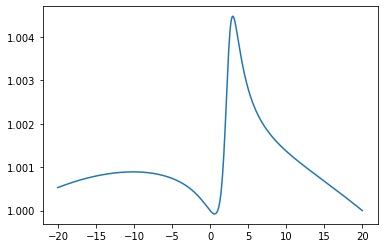

In [20]:
plt.plot(_grid, xsec_kl_param_0120/hh_xsec_CASE2_p4(_grid))